In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pendulum
from dateutil.relativedelta import relativedelta

from skill import config
from skill import plot

In [2]:
dir_dados = config.dir_dados
dir_img = config.dir_img

In [3]:
mes = ['', 'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro','Dezembro']

In [4]:
rmse_bruto = xr.open_dataset(dir_dados.joinpath('cam3-rmse_prev_bruta','cam3_init1_rmse.nc')).__xarray_dataarray_variable__
rmse_ajustado = xr.open_dataset(dir_dados.joinpath('cam3-rmse_prev_ajustada','cam3_init1_rmse_ajustado.nc')).__xarray_dataarray_variable__
diff = rmse_ajustado - rmse_bruto

<GeoAxesSubplot:title={'center':'Diferença'}>

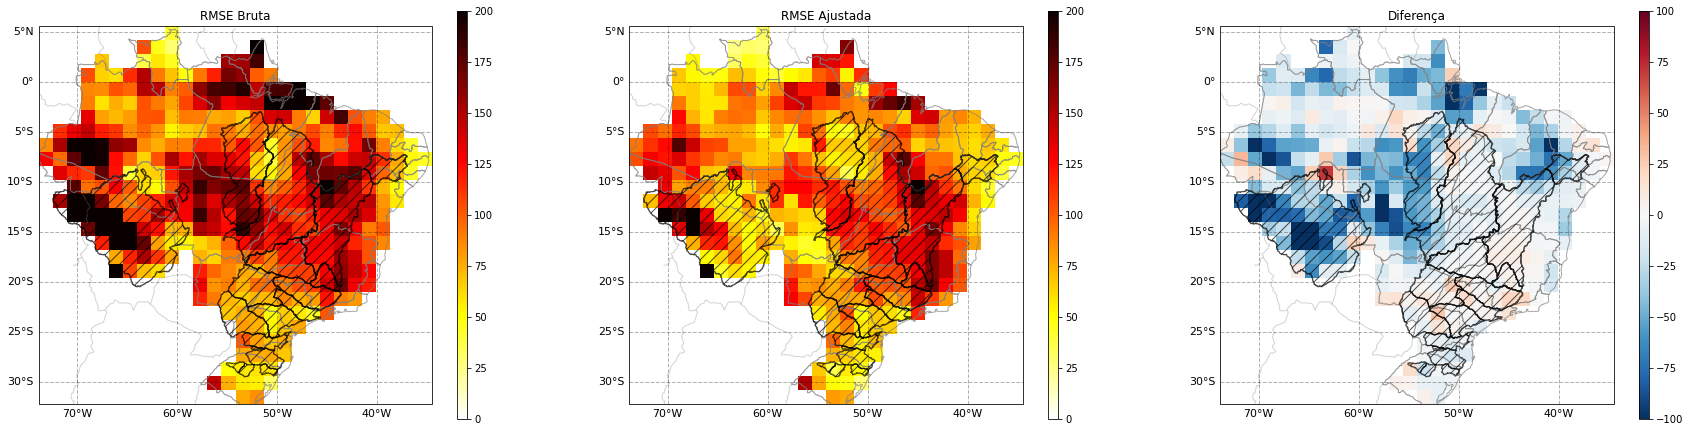

In [15]:
fig,ax = plt.subplots(1,3, figsize=(30,10), subplot_kw=dict(projection = ccrs.PlateCarree()))
ax[0].set_title('RMSE Bruta', fontsize=12)
ax[1].set_title('RMSE Ajustada', fontsize=12)
ax[2].set_title('Diferença', fontsize=12)
plot.plot_mesh(ax[0], rmse_bruto.sel(lead=1), vmin=0, vmax=200, cmap='hot_r')
plot.plot_mesh(ax[1], rmse_ajustado.sel(lead=1, month=2), vmin=0, vmax=200, cmap='hot_r')
plot.plot_mesh(ax[2], diff.sel(lead=1, month=2), vmin=-100, vmax=100, cmap='RdBu_r')


In [7]:
init = np.arange(1,13,1)
leads = np.arange(1,4,1)

dir_img.joinpath('rmse').mkdir(exist_ok=True)

for i in init:
    rmse_bruto = xr.open_dataset(dir_dados.joinpath('cam3-rmse_prev_bruta',f'cam3_init{i}_rmse.nc')).__xarray_dataarray_variable__
    rmse_ajustado = xr.open_dataset(dir_dados.joinpath('cam3-rmse_prev_ajustada',f'cam3_init{i}_rmse_ajustado.nc')).__xarray_dataarray_variable__
    diff = rmse_ajustado - rmse_bruto
    
    data = pendulum.now().set(year=1975, month=i, day=21)
    
    for lead in leads:
        
        lead_mes = (data + relativedelta(months=lead)).month

        fig,ax = plt.subplots(1,3, figsize=(30,10), subplot_kw=dict(projection = ccrs.PlateCarree()))
        
        ax[0].set_title('RMSE Bruta', fontsize=12)
        ax[1].set_title('RMSE Ajustada', fontsize=12)
        ax[2].set_title('Diferença', fontsize=12)
        plot.plot_mesh(ax[0], rmse_bruto.sel(lead=lead), vmin=0, vmax=200, cmap='hot_r')
        plot.plot_mesh(ax[1], rmse_ajustado.sel(lead=lead, month=lead_mes), vmin=0, vmax=200, cmap='hot_r')
        plot.plot_mesh(ax[2], diff.sel(lead=lead, month=lead_mes), vmin=-100, vmax=100, cmap='RdBu_r')

        
        plt.close('all')
        
        fig.savefig(dir_img.joinpath('rmse', f'cam3-rmse-init{i}_lead{lead}.png'), bbox_inches='tight', facecolor='w', edgecolor='w')